# **CURVA ROC EN REGRESION LOGISTICA**

In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

In [2]:
datos = pd.read_csv("diabetes.csv")
datos.head()
datos.describe()
datos["Pregnancies"].value_counts()
datos.isna().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [3]:
X = datos.drop(["Outcome"], axis=1)
X.head()
y = datos["Outcome"]
y

,Outcome
0,1
1,0
2,1
3,0
4,1
...,...
763,0
764,0
765,0
766,1


In [4]:
from sklearn.model_selection import train_test_split
X_ent, X_pru, y_ent, y_pru = train_test_split(X, y, test_size=0.3)

In [5]:
model = LogisticRegression(max_iter=1000)
model.fit(X_ent, y_ent)


LogisticRegression(max_iter=1000)

In [10]:
from sklearn.metrics import roc_curve, auc

# Chicos, pi retorna dos columnas la primera para sanos (0) y la otra para enfermos (1)
# y nuestro objetivo es utilizar enfermos o positivos
# [:,1] utiliza todas las filas y segunda columna
# Aquí el error, elegí el método model.predict_log_proba() en lugar de:
pi = model.predict_proba(X_pru)[:,1]
pi

array([0.58918293, 0.29373589, 0.11706399, 0.26193827, 0.19004617,
       0.79948671, 0.62995702, 0.90258579, 0.88786115, 0.29496768,
       0.03582206, 0.07124677, 0.17151933, 0.93454141, 0.54957347,
       0.87619245, 0.88230611, 0.08629886, 0.87916745, 0.13484994,
       0.18375766, 0.09345747, 0.18706391, 0.0199336 , 0.2474305 ,
       0.11224942, 0.48614578, 0.18160492, 0.45449485, 0.02398717,
       0.59609182, 0.08223843, 0.37650075, 0.12125802, 0.12004046,
       0.32067537, 0.10252334, 0.12833708, 0.12901254, 0.23297451,
       0.83719762, 0.42424874, 0.2819743 , 0.07299399, 0.53785354,
       0.27214194, 0.4936792 , 0.1254533 , 0.09939864, 0.47244702,
       0.59883088, 0.54916234, 0.127123  , 0.0703905 , 0.08842258,
       0.29031407, 0.75731414, 0.06076398, 0.2908698 , 0.35472081,
       0.89696893, 0.33464409, 0.12530733, 0.12726181, 0.12060107,
       0.63877122, 0.11124888, 0.20063944, 0.39515219, 0.7776542 ,
       0.09670208, 0.58056366, 0.82167813, 0.19287798, 0.71487

In [11]:
# Aquí obtenemos los factores vistos en clases
fpr, tpr, umbr = roc_curve(y_pru, pi)
roc_auc = auc(fpr, tpr)

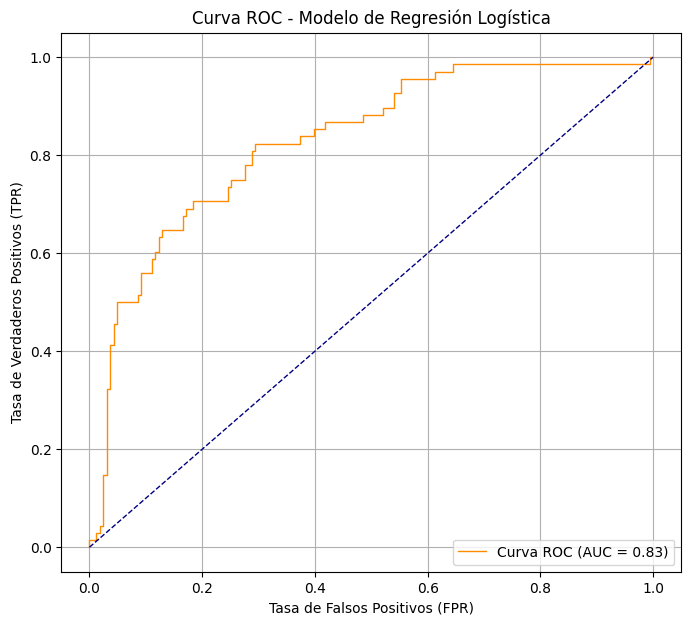

In [12]:
# Construcción de la gráfica
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 7))
plt.plot(fpr, tpr, color='darkorange', lw=1, label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC - Modelo de Regresión Logística')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()